In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("icefire")
#sns.color_palette("YlOrBr", as_cmap=True)

In [20]:
df = pd.read_csv("C:\\Users\\A7\\Desktop\\students-performance\\StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
309,female,group D,high school,free/reduced,none,49,57,52
911,female,group A,some college,standard,none,69,84,82
691,female,group E,associate's degree,free/reduced,none,73,76,78
800,male,group C,some high school,standard,completed,67,73,68
416,male,group C,bachelor's degree,standard,completed,71,74,68


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [22]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
passmark = 50
df.rename(columns = {"math score":"math_score",
                     "reading score":"reading_score",
                     "writing score":"writing_score",
                     "race/ethnicity":"group"},inplace = True)

In [24]:
df["percentage"] = round((df["math_score"]+df["reading_score"]+df["writing_score"]) / 3,2 )
df.head(3)

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67


In [25]:
def Grade(percentage):
    if (percentage >= 96): return "Outstanding"
    if (percentage >= 86): return "Very Good"
    if (percentage >= 76): return "Good"
    if (percentage >= 65): return "Avarege"
    if (percentage >= 55): return "Sufficient"
    if (percentage >= 50): return "Passable"
    if (percentage < 50) : return "Fail"

In [26]:
df["grade"] = df.apply(lambda i: Grade(i["percentage"]), axis=1)

In [27]:
#The distplot represents the univariate distribution of data i.e.
#data distribution of a variable against the density distribution. The seaborn

Text(0.5, 1.0, 'Gender Ratio')

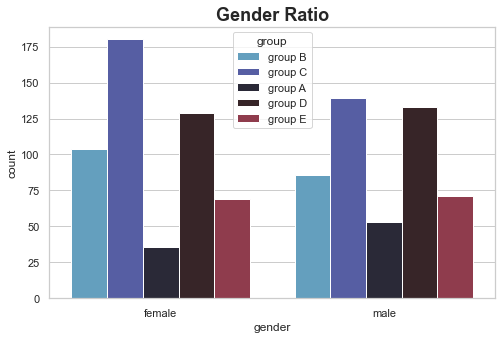

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["gender"],data=df , hue=df["group"])
plt.title("Gender Ratio" , fontsize=18,fontweight="bold")

# bar plot

Text(0.5, 1.0, 'Gender Ratio')

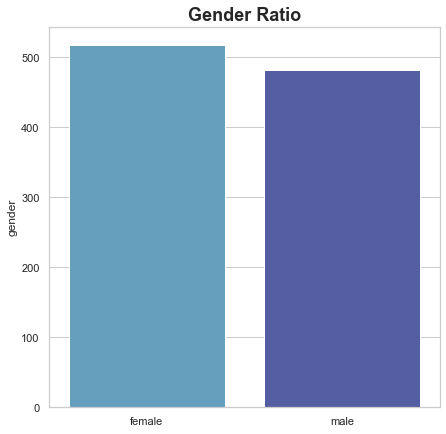

In [29]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
sns.barplot(x=df["gender"].value_counts().index,y=df["gender"].value_counts(),ax=ax)
plt.title("Gender Ratio" , fontsize=18,fontweight="bold")

C:\Users\A7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


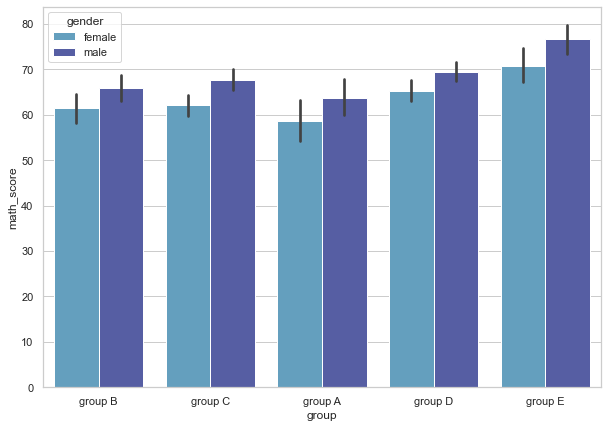

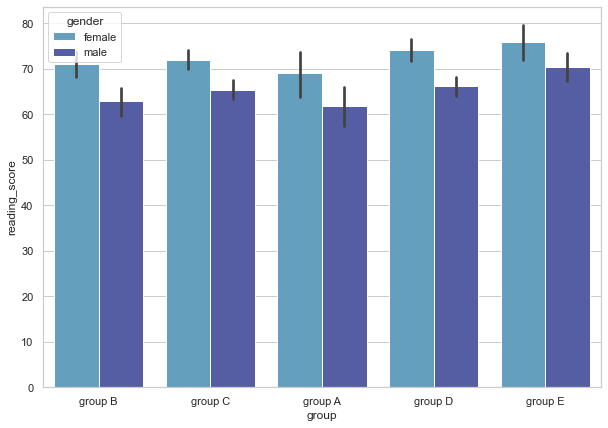

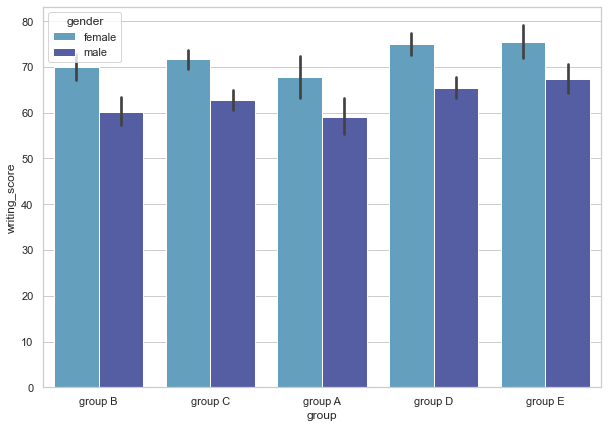

In [30]:
def bar_plot(x, y, hue):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    sns.barplot(x, y, hue=hue, data=df)
for L in ['math_score', 'reading_score', 'writing_score']:
    bar_plot("group",L,"gender")

In [31]:
# def bar_plot_avgline(x,y,hue,ax):
#     sns.barplot(x,y,data=df,hue=hue,ax=ax)
#     avgline=(df[y].sum().sum())/len(df)
#     ax.axhline(avgline)
#     ax.set_xticklabels(df[x].value_counts().index)
#     ax.set_title(f"The Avarege Score for {y} is {avgline}")

In [32]:
# fig , ax = plt.subplots(1,3,figsize=(30,10))
# for ind , i in enumerate(['math_score', 'reading_score', 'writing_score']):
#     bar_plot_avgline("group",i,"gender",ax[ind])
# plt.tight_layout();

#  #Distplot

C:\Users\A7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

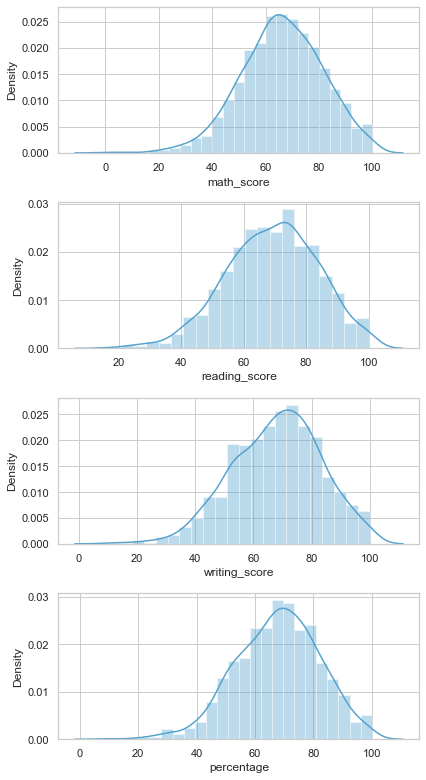

In [33]:
def dist_plot(data,x,ax):
    sns.distplot(df[x],ax=ax)
fig,ax = plt.subplots(4,1,figsize=(6,11))
for indx , i in enumerate(['math_score', 'reading_score', 'writing_score','percentage']):
    dist_plot(df,i,ax[indx])
plt.tight_layout();

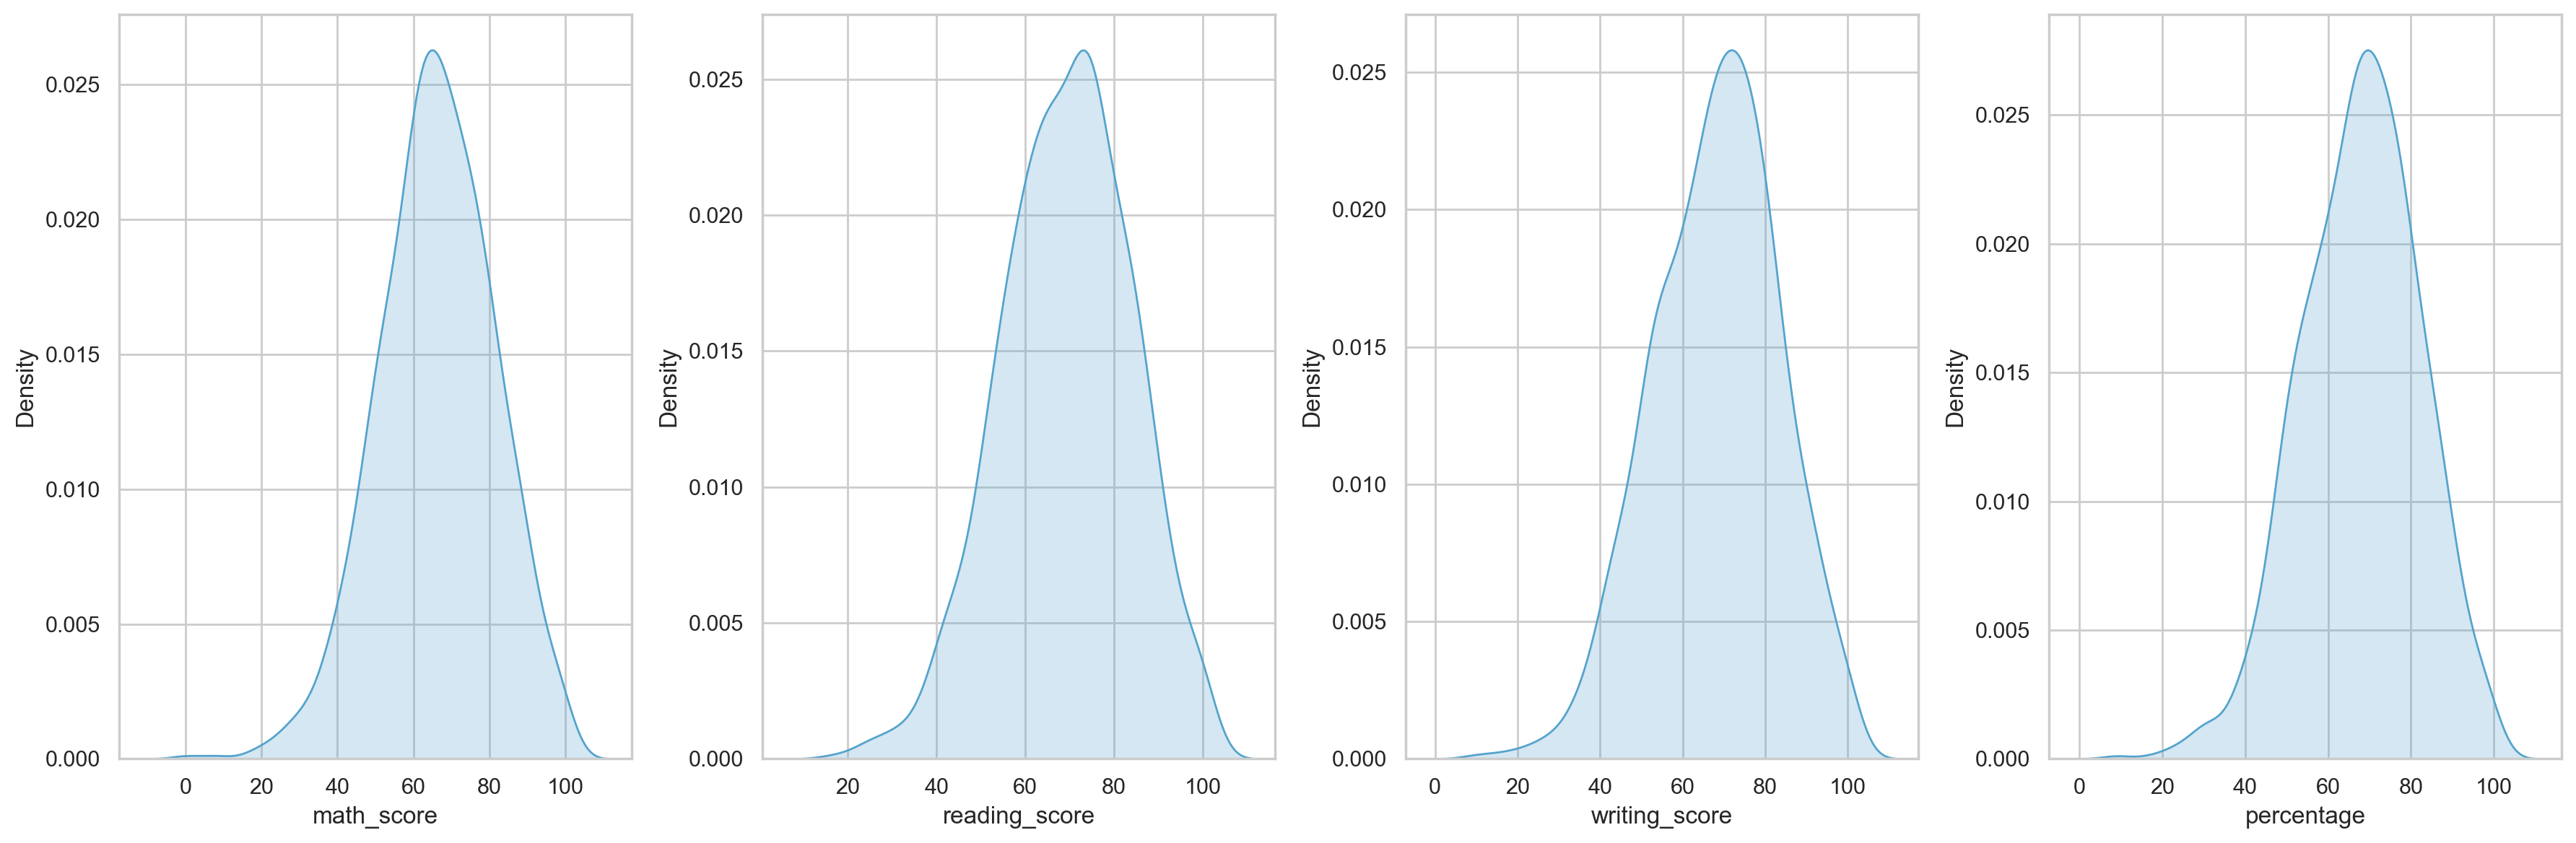

In [34]:
def kde_plot(df,x,ax):
    sns.kdeplot(df[x],ax=ax,shade=True)
fig,ax=plt.subplots(1,4,figsize=(18,6) ,dpi=200)
for indx,i in enumerate(['math_score', 'reading_score', 'writing_score','percentage']):
    kde_plot(df,i,ax=ax[indx])
plt.tight_layout();
plt.show()

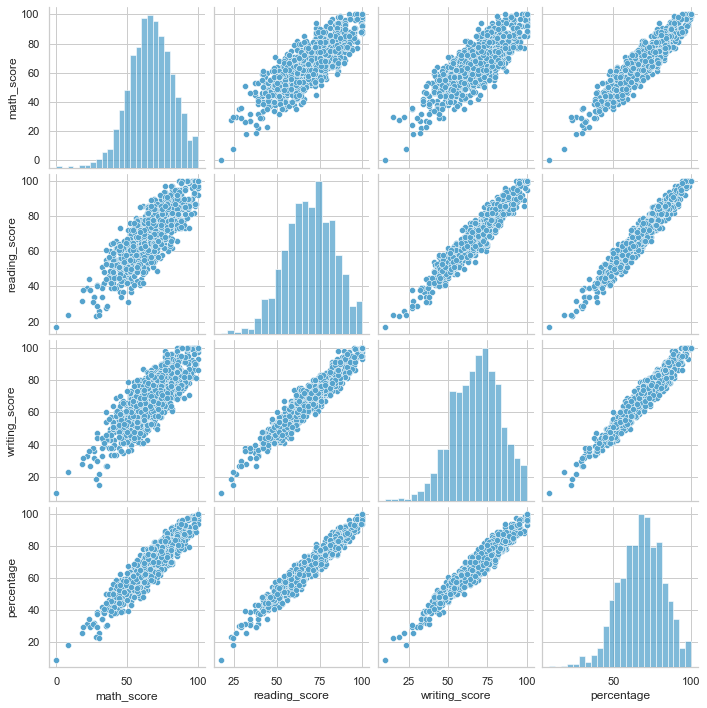

In [35]:
sns.pairplot(df)

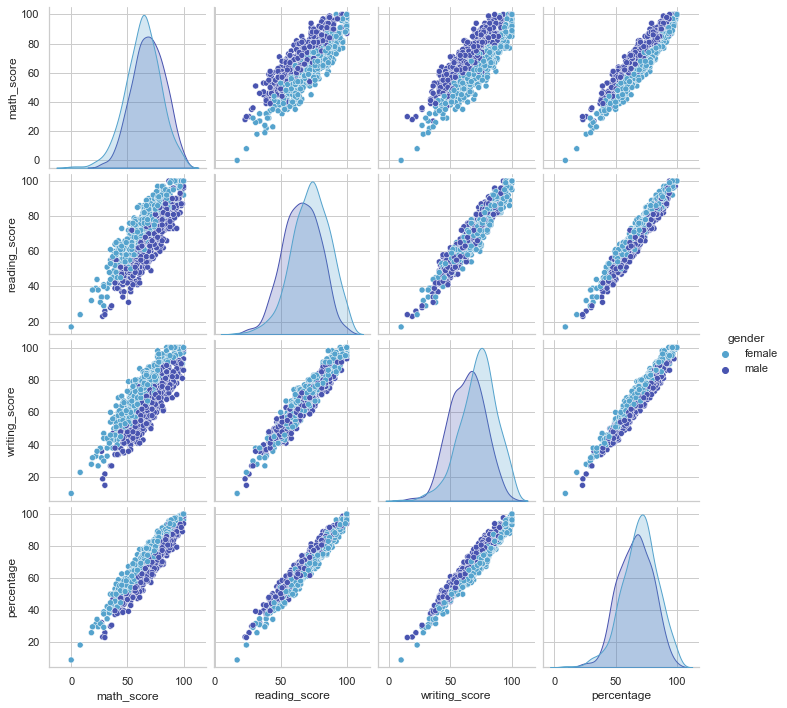

In [36]:
sns.pairplot(data=df,hue="gender")
plt.show()